In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error, mean_absolute_percentage_error

# 맥 폰트 

plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False


# # 윈도우 폰트 
# plt.rc('font', family='Malgun Gothic')

# plt.rcParams['axes.unicode_minus'] = False

# 1. 최종수요, 재정 부문

In [3]:
# 맥 
one_data1 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 1').loc[17:, :].reset_index(drop=True)
one_data2 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 2').loc[1:51, :].reset_index(drop=True)
one_data3 =pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 3')
one_data4 =pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 4').loc[1: , :].reset_index(drop=True)
one_data4_2 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 4-2').loc[17:, :].reset_index(drop=True)
one_data5 =pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 5').loc[17:, :].reset_index(drop=True)
one_data6 =pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 6')
one_data7 =pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 7').loc[18:, :].reset_index(drop=True)

In [ ]:
# 윈도우 
one_data1 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 1').loc[17:, :].reset_index(drop=True)
one_data2 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 2').loc[1:51, :].reset_index(drop=True)
one_data3 =pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 3')
one_data4 =pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 4').loc[1: , :].reset_index(drop=True)
one_data4_2 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 4-2').loc[17:, :].reset_index(drop=True)
one_data5 =pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 5').loc[17:, :].reset_index(drop=True)
one_data6 =pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 6')
one_data7 =pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 7').loc[18:, :].reset_index(drop=True)

In [4]:
# [Box 1] 민간소비지출 행태 방정식  

def pcp(gni, rcb, lab_em):
    return np.exp((0.802041 * np.log(gni)) + (-0.008639 * np.log(rcb)) + (0.718264 * np.log(lab_em)) - 5.096627)

In [5]:
# [BOX 2] 정부소비지출 행태방정식

def after_gc(before_gc) :
    return np.exp(0.986935 * np.log(before_gc) + 0.194679)

In [6]:
# [BOX 3] 정부수입 행태방정식

def tax(gdp_all, gdpdefl, gc, period9899):
    return np.exp((0.691266 * np.log(gdp_all)) + (1.110259 * np.log(gdpdefl)) + (0.447023 * np.log(gc)) + (-0.081009 * period9899) - 5.485974)

In [7]:
#[Box 4] 총고정자본형성 행태방정식

# 총 고정 자본형성 정의 방정식 
def ic(ime, ihouse):
    return ime + ihouse


# 설비투자
def ime(gdp_all,before_rndinvest_all2,exr_avg,trend,step98,spike98):
    return np.exp((0.688672 * np.log(gdp_all)
                   + 0.282546 * np.log(before_rndinvest_all2)
                   - 0.328785 * np.log(exr_avg)
                   - 0.007545 * trend * step98
                   - 0.172188 * spike98
                   + 0.972870))

#건설투자
def ihouse(gdp_all,rcb,cpi,step98,trend,spike98):
    return np.exp((1.098164 * np.log(gdp_all)
                   - 0.569013 * (rcb / cpi)
                   - 0.014699 * step98 * trend
                   + 0.301364 * spike98
                   - 2.539373))

In [8]:
#[Box 5] 재고 및 통계불일치 행태방정식
def iisr(pcp,exp_value, exp_servalue, gap1_all,before_imp_value,rcb,cpi,before_iisr,cefore_iisr):
    return (0.082791 * (pcp + exp_value + exp_servalue)
            + (0.129106 * gap1_all)
            + (0.209911 * before_imp_value)
            - (88447.83 * (rcb / cpi))
            - (0.282324 * before_iisr)
            - (0.162766 * cefore_iisr)
            - 38853.77) 

In [9]:
# [BOX 6] 국내총생산(GDP)

def dd (pcp, ime, ihouse, gc) :
    return pcp + ime +ihouse + gc 
def fd (gxc, gxs):
    return gxc + gxs


def gdp_all(dd, fd, gmc, gms, iisr):
    return (dd + fd - gmc - gms + iisr)

In [10]:
# [Box 7] 국민총소득(GNI) 행태 방정식 
def gni(gdp_all, tot1):
    return np.exp(0.955061 * np.log(gdp_all) + 0.172046 * np.log(tot1) - 0.181524)

In [11]:
# 1 총합 

def total_one(data1, data2, data3, data4, data4_2, data5, data6, data7):
    # data 1 
    gni_v = data1['gni']
    rcb = data1['rcb ']
    lab_em = data1['lab_em']
    pcp_pred = pcp(gni_v, rcb, lab_em)
    pcp_target = data1['pcp_target'] 
    data1['pcp_pred'] = pcp_pred

    pcp_mae = mean_absolute_error(pcp_target, pcp_pred)
    pcp_mse = mean_squared_error(pcp_target, pcp_pred)
    pcp_rmse = np.sqrt(mean_squared_error(pcp_target, pcp_pred))
    pcp_mape = mean_absolute_percentage_error(pcp_target, pcp_pred)
    pcp_r2_scroe = r2_score(pcp_target, pcp_pred)
    pcp_metrix = [pcp_mae, pcp_mse, pcp_rmse, pcp_mape, pcp_r2_scroe]

    
    # data 2 
    before_gc = data2['gc(-1)']
    after_gc_pred = after_gc(before_gc)
    after_gc_target = data2['gc_target']
    data2['after_gc_pred'] = after_gc_pred
    
    after_gc_mae = mean_absolute_error(after_gc_target, after_gc_pred)
    after_gc_mse = mean_squared_error(after_gc_target, after_gc_pred)
    after_gc_rmse = np.sqrt(mean_squared_error(after_gc_target, after_gc_pred))
    after_gc_mape = mean_absolute_percentage_error(after_gc_target, after_gc_pred)
    after_gc_r2_score = r2_score(after_gc_target, after_gc_pred)
    gc_metrix = np.round([after_gc_mae, after_gc_mse, after_gc_rmse, after_gc_mape, after_gc_r2_score], 4)
    
    # data 3
    gdp_all_v = data3['GDP_all'] 
    gdpdefl = data3['gdpdefl']
    gc = data3['gc']
    period9899 = data3['period9899']
    
    tax_pred = tax(gdp_all_v, gdpdefl, gc, period9899)
    tax_target = data3['tax_target']
    data3['tax_pred'] = tax_pred
    

    tax_mae = mean_absolute_error(tax_target, tax_pred)
    tax_mse = mean_squared_error(tax_target, tax_pred)
    tax_rmse = np.sqrt(mean_squared_error(tax_target, tax_pred))
    tax_mape = mean_absolute_percentage_error(tax_target, tax_pred)
    tax_r2_score = r2_score(tax_target, tax_pred)
    tax_metrix = [tax_mae, tax_mse, tax_rmse, tax_mape, tax_r2_score]
    
    # data 4 
    gdp_all_v = data4['GDP_all']
    before_rndinvest_all2 = data4['before_rndinvest_all2(억)']
    exr_avg = data4['exr_avg']
    trend = data4['trend']
    step98 = data4['step98']
    spike98 = data4['spike98']
    
    ime_pred = ime(gdp_all_v,before_rndinvest_all2,exr_avg,trend,step98,spike98)
    ime_target = data4['ime_target']
    data4['ime_pred'] = ime_pred
    

    ime_mae = mean_absolute_error(ime_target, ime_pred)
    ime_mse = mean_squared_error(ime_target, ime_pred)
    ime_rmse = np.sqrt(mean_squared_error(ime_target, ime_pred))
    ime_mape = mean_absolute_percentage_error(ime_target, ime_pred)
    ime_r2_score = r2_score(ime_target, ime_pred)
    ime_metrix = [ime_mae, ime_mse, ime_rmse, ime_mape, ime_r2_score]
    
    
    # data 4_2
    gdp_all_v = data4_2['gdp_all']
    rcb = data4_2['rcb']
    cpi = data4_2['cpi']
    step98 = data4_2['step98']
    trend = data4_2['trend'] 
    spike98 = data4_2['spike98']
    
    ihouse_pred = ihouse(gdp_all_v,rcb,cpi,step98,trend,spike98)
    ihouse_target = data4_2['ihouse_target']
    data4_2['ihouse_pred'] = ihouse_pred
    
    ihouse_mae = mean_absolute_error(ihouse_target, ihouse_pred)
    ihouse_mse = mean_squared_error(ihouse_target, ihouse_pred)
    ihouse_rmse = np.sqrt(mean_squared_error(ihouse_target, ihouse_pred))
    ihouse_mape = mean_absolute_percentage_error(ihouse_target, ihouse_pred)
    ihouse_r2_score = r2_score(ihouse_target, ihouse_pred)
    ihouse_metrix = [ihouse_mae, ihouse_mse, ihouse_rmse, ihouse_mape, ihouse_r2_score]
    
    # data 5
    pcp_v = data5['pcp(십억)']
    exp_value = data5['exp_value(십억)']
    exp_servalue = data5['exp_servalue(십억)']
    gap1_all = data5['gap1_all(십억)']
    before_imp_value = data5['before_imp_value(십억)']
    rcb = data5['rcb']
    cpi = data5['cpi']
    before_iisr = data5['before_iisr']
    cefore_iisr = data5['cefore_iisr']
    
    iisr_pred = iisr(pcp_v,exp_value, exp_servalue, gap1_all,before_imp_value,rcb,cpi,before_iisr,cefore_iisr)
    iisr_target = data5['iisr_target']
    data5['iisr_pred'] = iisr_pred
    
    iisr_mae = mean_absolute_error(iisr_target, iisr_pred)
    iisr_mse = mean_squared_error(iisr_target, iisr_pred)
    iisr_rmse = np.sqrt(mean_squared_error(iisr_target, iisr_pred))
    iisr_mape = mean_absolute_percentage_error(iisr_target, iisr_pred)
    iisr_r2_score = r2_score(iisr_target, iisr_pred)
    iisr_metrix = [iisr_mae, iisr_mse, iisr_rmse, iisr_mape, iisr_r2_score]
    
    # data 6
    dd_v = data6['dd']
    fd_v = data6['fd']
    gmc_v = data6['gmc']
    gms_v = data6['gms']
    iisr_v = data6['iisr']
    
    gdp_all_pred = gdp_all(dd_v, fd_v, gmc_v, gms_v, iisr_v)
    gdp_target = data6['gdp_target']
    data6['gdp_all_pred'] = gdp_all_pred
    
    gdp_mae = mean_absolute_error(gdp_target, gdp_all_pred)
    gdp_mse = mean_squared_error(gdp_target, gdp_all_pred)
    gdp_rmse = np.sqrt(mean_squared_error(gdp_target, gdp_all_pred))
    gdp_mape = mean_absolute_percentage_error(gdp_target, gdp_all_pred)
    gdp_r2_score = r2_score(gdp_target, gdp_all_pred)
    gdp_metrix = [gdp_mae, gdp_mse, gdp_rmse, gdp_mape, gdp_r2_score]
    
    # data 7
    gdp_all_v = data7['gdp_all']
    tot1 = data7['tot1']
    
    gni_pred = gni(gdp_all_v, tot1)
    gni_target = data7['gni_target ']
    data7['gni_pred'] = gni_pred
    
    gni_mae = mean_absolute_error(gni_target, gni_pred)
    gni_mse = mean_squared_error(gni_target, gni_pred)
    gni_rmse = np.sqrt(mean_squared_error(gni_target, gni_pred))
    gni_mape = mean_absolute_percentage_error(gni_target, gni_pred)
    gni_r2_score = r2_score(gni_target, gni_pred)
    gni_metrix = [gni_mae, gni_mse, gni_rmse, gni_mape, gni_r2_score]
    
    total_one_metrix = pd.DataFrame( index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], columns=['BOX 1', 'BOX 2', 'BOX 3', 'BOX 4', 'BOX 4_2','BOX 5', 'BOX 6', 'BOX 7'])
    total_one_metrix['BOX 1'] = pcp_metrix
    total_one_metrix['BOX 2'] = gc_metrix
    total_one_metrix['BOX 3'] = tax_metrix
    total_one_metrix['BOX 4'] = ime_metrix
    total_one_metrix['BOX 4_2'] = ihouse_metrix
    total_one_metrix['BOX 5'] = iisr_metrix
    total_one_metrix['BOX 6'] = gdp_metrix
    total_one_metrix['BOX 7'] = gni_metrix
    return data1, data2, data3, data4, data4_2, data5, data6, data7, total_one_metrix

In [12]:
one_data1, one_data2, one_data3, one_data4, one_data4_2, one_data5,one_data6, one_data7, total_one_metrix = total_one(one_data1, one_data2, one_data3, one_data4, one_data4_2, one_data5, one_data6, one_data7)

In [13]:
# box 1 
one_data1['연도 '] = one_data1['연도 '].astype('int64')
one_data1.head()

,연도,gni,rcb,lab_em,pcp_target,pcp_pred
0,1987,378643.6,0.1262,16354,204563.2,197148.308381
1,1988,429338.0,0.1418,16869,223587.6,222737.730147
2,1989,466944.8,0.1517,17560,247922.7,245081.789420
3,1990,511161.1,0.1648,18085,272970.2,268969.943697
4,1991,566970.6,0.1889,18649,297758.6,298445.637790


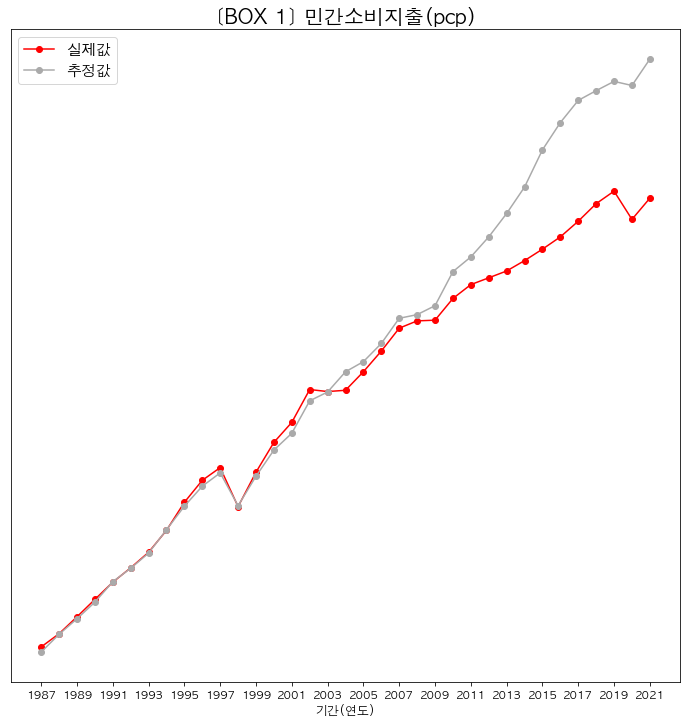

In [14]:
xticks = list(one_data1['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[BOX 1] 민간소비지출(pcp)', fontsize=20)
plt.plot(one_data1['연도 '], one_data1['pcp_target'], color='red', marker='o')
plt.plot(one_data1['연도 '], one_data1['pcp_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 2), label = xticks, fontsize=11)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [15]:
# box 2 
one_data2['연도 '] = one_data2['연도 '].astype('int64')
one_data2.head()

,연도,gc(-1),gc_target,after_gc_pred
0,1971,22595.5,24545.5,24081.563190
1,1972,24545.5,26548.7,26131.534672
2,1973,26548.7,27148.4,28235.218328
3,1974,27148.4,29106.9,28864.589554
4,1975,29106.9,31114.5,30918.745331


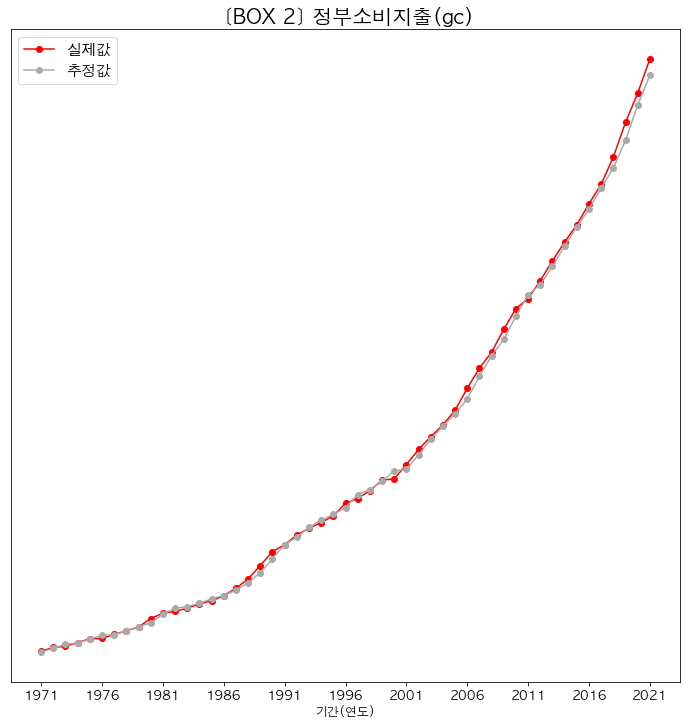

In [16]:
xticks = list(one_data2['연도 '])
plt.figure(figsize=(12, 12))
plt.title(' [BOX 2] 정부소비지출(gc)', fontsize=20)
plt.plot(one_data2['연도 '], one_data2['gc_target'], color='red', marker='o')
plt.plot(one_data2['연도 '], one_data2['after_gc_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 5), label = xticks, fontsize=13)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [17]:
one_data3['연도 '] = one_data3['연도 '].astype('int64')
one_data3.head()

,연도,GDP_all,gdpdefl,gc,period9899,tax_target,tax_pred
0,1970,101552.488193,3.879,22595.5,0,4000,4768.767151
1,1971,109630.574774,4.313,24545.5,0,5000,5869.393028
2,1972,115699.810332,4.994,26548.7,0,5000,7424.878223
3,1973,127620.786037,5.629,27148.4,0,6000,9166.010191
4,1974,138514.671164,7.352,29106.9,0,9000,13460.349857


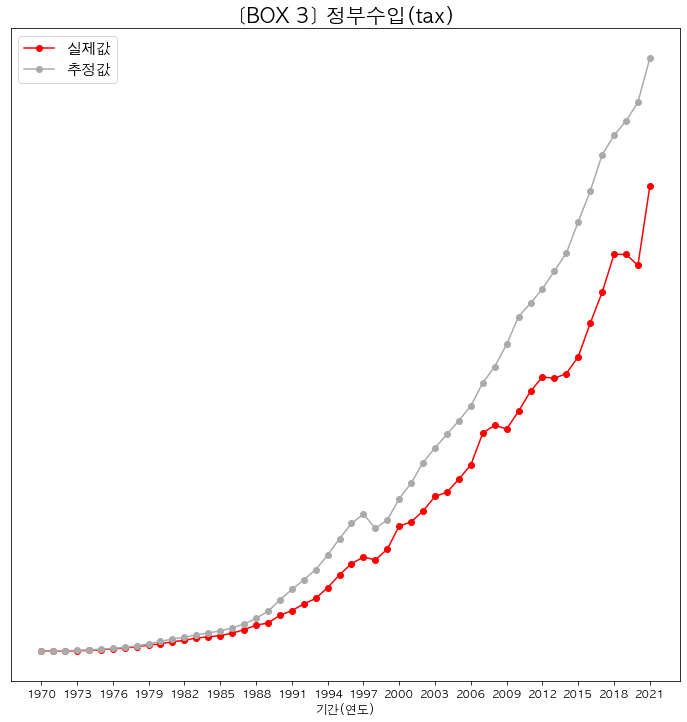

In [18]:
xticks = list(one_data3['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[BOX 3] 정부수입(tax)', fontsize=20)
plt.plot(one_data3['연도 '], one_data3['tax_target'], color='red', marker='o')
plt.plot(one_data3['연도 '], one_data3['tax_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 3), label = xticks, fontsize=11)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [19]:
one_data4['연도 '] = one_data4['연도 '].astype('int64')
one_data4.head()

,연도,ime_target,GDP_all,before_rndinvest_all2(억),exr_avg,trend,step98,spike98,ime_pred
0,1971,2767.0,109630.574774,104.37,373.3,2,0,0,4150.097587
1,1972,3050.1,115699.810332,102.55,398.9,3,0,0,4193.187084
2,1973,3728.8,127620.786037,118.01,397.5,4,0,0,4673.115320
3,1974,4304.8,138514.671164,152.93,484.0,5,0,0,4986.536935
4,1975,4851.1,147563.495139,228.12,484.0,6,0,0,5831.709418


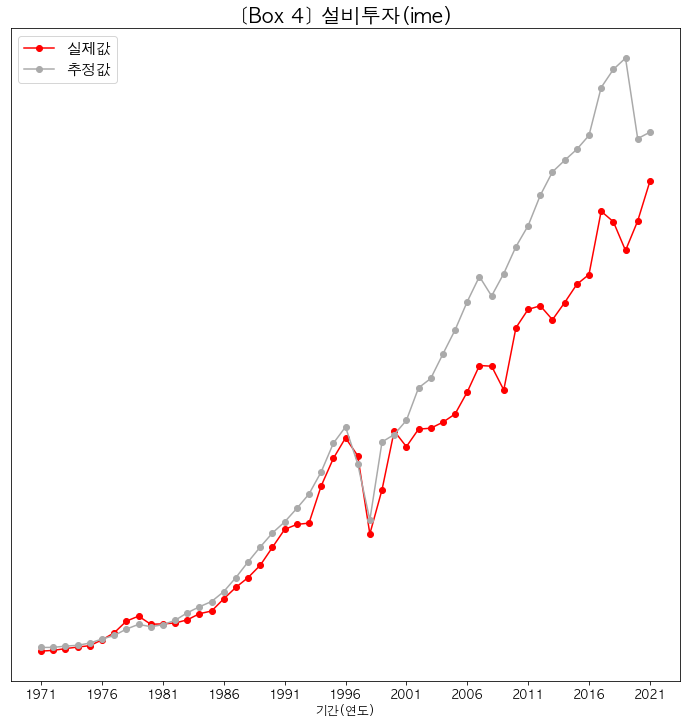

In [20]:
xticks = list(one_data4['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 4] 설비투자(ime)', fontsize=20)
plt.plot(one_data4['연도 '], one_data4['ime_target'], color='red', marker='o')
plt.plot(one_data4['연도 '], one_data4['ime_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 5), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [21]:
one_data4_2['연도 '] = one_data4_2['연도 '].astype('int64')
one_data4_2.head()

,연도,gdp_all,rcb,cpi,step98,trend,spike98,ihouse_target,ihouse_pred
0,1987,365210.421665,12.62,3.0,0,18,0,75513.5,9251.259026
1,1988,403748.821047,14.18,7.1,0,19,0,86025.4,36312.118802
2,1989,454341.931406,15.17,5.7,0,20,0,100533.1,28327.910629
3,1990,522920.707609,16.48,8.6,0,21,0,130673.2,50512.089302
4,1991,575954.303320,18.89,9.3,0,22,0,148298.1,52610.302228


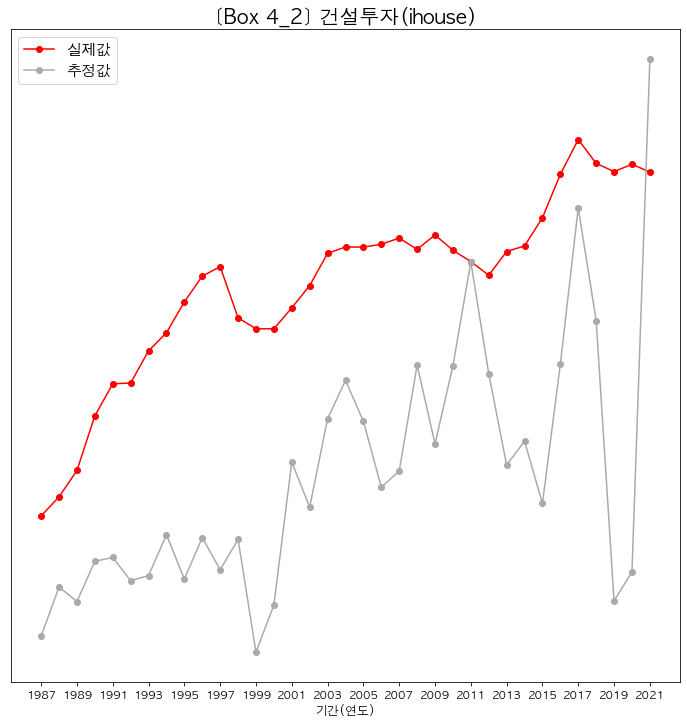

In [22]:
xticks = list(one_data4_2['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 4_2] 건설투자(ihouse)', fontsize=20)
plt.plot(one_data4_2['연도 '], one_data4_2['ihouse_target'], color='red', marker='o')
plt.plot(one_data4_2['연도 '], one_data4_2['ihouse_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 2), label = xticks, fontsize=11)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [69]:
X = one_data4_2[['gdp_all', 'rcb', 'cpi', 'spike98']]
y = one_data4_2['ihouse_target']

X['trend'] = [i for i in range(1, len(X)+1)]

lr_model = LinearRegression()
lr_model.fit(X, y)
pred = lr_model.predict(X)

X['ihouse_pred'] = pred
X['ihouse_target'] = y
X['연도'] = one_data4_2['연도 ']

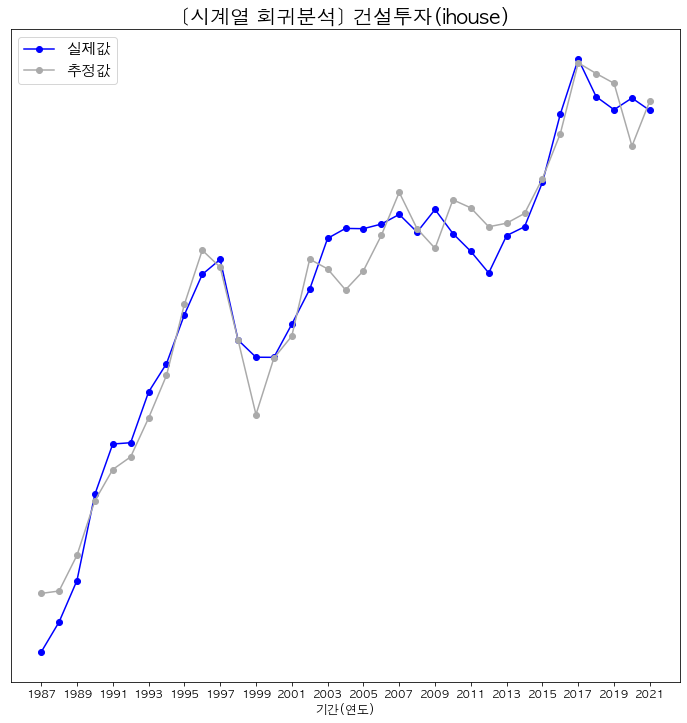

In [70]:
xticks = list(X['연도'])
plt.figure(figsize=(12, 12))
plt.title('[시계열 회귀분석] 건설투자(ihouse)', fontsize=20)
plt.plot(X['연도'], X['ihouse_target'], color='blue', marker='o')
plt.plot(X['연도'], X['ihouse_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 2), label = xticks, fontsize=11)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [71]:
mae = mean_absolute_error(y.values, pred)
mse = mean_squared_error(y.values, pred)
rmse = np.sqrt(mean_squared_error(y.values, pred))
mape = mean_absolute_percentage_error(y.values, pred)
r2_score1 = r2_score(y, pred)
metrix = [mae, mse, rmse, mape, r2_score1]

metrix4_2 = pd.DataFrame( index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], columns=['BOX 4_2'])
metrix4_2['BOX 4_2'] = metrix

In [26]:
metrix4_2

,BOX 4_2
MAE,8.338099e+03
MSE,1.048288e+08
RMSE,1.023859e+04
MAPE,4.794493e-02
R2,9.584444e-01


In [27]:
one_data5['연도 '] = one_data5['연도 '].astype('int64')
one_data5.head()

,연도,pcp(십억),exp_value(십억),exp_servalue(십억),gap1_all(십억),before_imp_value(십억),rcb,cpi,before_iisr,cefore_iisr,iisr_target,iisr_pred
0,1987,204563.2,37460.67846,11699.99710,-617.205613,3248.430,12.62,31.29,145.5,358.8,28.5,-53018.109046
1,1988,223587.6,41522.39903,12300.00170,8511.025147,3543.638,14.18,33.53,28.5,145.5,357.9,-51480.791588
2,1989,247922.7,42391.52745,12200.00250,-222.627546,4179.540,15.17,35.44,357.9,28.5,452.4,-50925.272136
3,1990,272970.2,46596.77441,13399.99656,3498.339534,5002.566,16.48,38.48,452.4,357.9,-175.2,-47851.272405
4,1991,297758.6,54585.35766,13899.99685,13857.460540,6189.925,18.89,42.07,-175.2,452.4,-18.1,-45182.098325


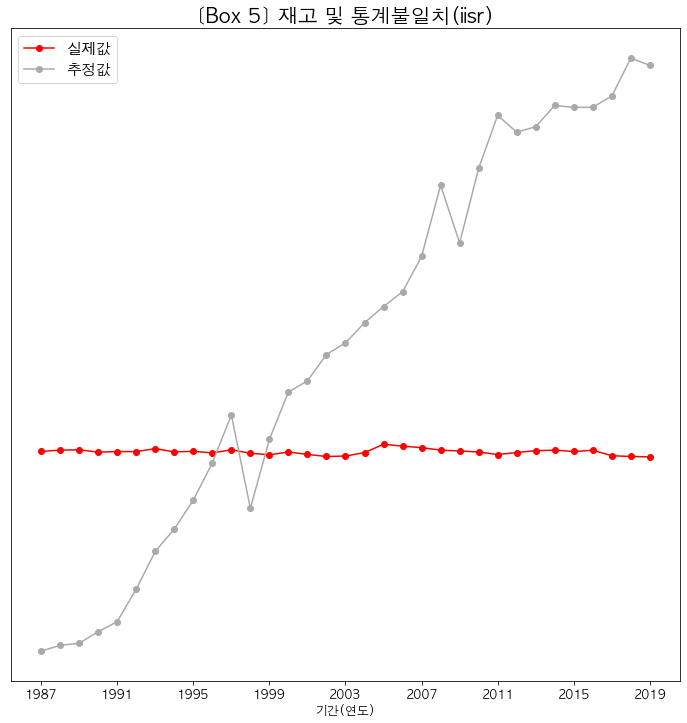

In [28]:
xticks = list(one_data5['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 5] 재고 및 통계불일치(iisr)', fontsize=20)
plt.plot(one_data5['연도 '], one_data5['iisr_target'], color='red', marker='o')
plt.plot(one_data5['연도 '], one_data5['iisr_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 4), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [72]:
X = one_data5[['pcp(십억)', 'exp_value(십억)', 'exp_servalue(십억)', 'gap1_all(십억)', 'before_imp_value(십억)', 'rcb', 'cpi', 'before_iisr','cefore_iisr' ]]
y = one_data5['iisr_target']


lr_model = LinearRegression()
lr_model.fit(X, y)
pred = lr_model.predict(X)

X['iisr_pred'] = pred
X['iisr_target'] = y
X['연도'] = one_data5['연도 ']

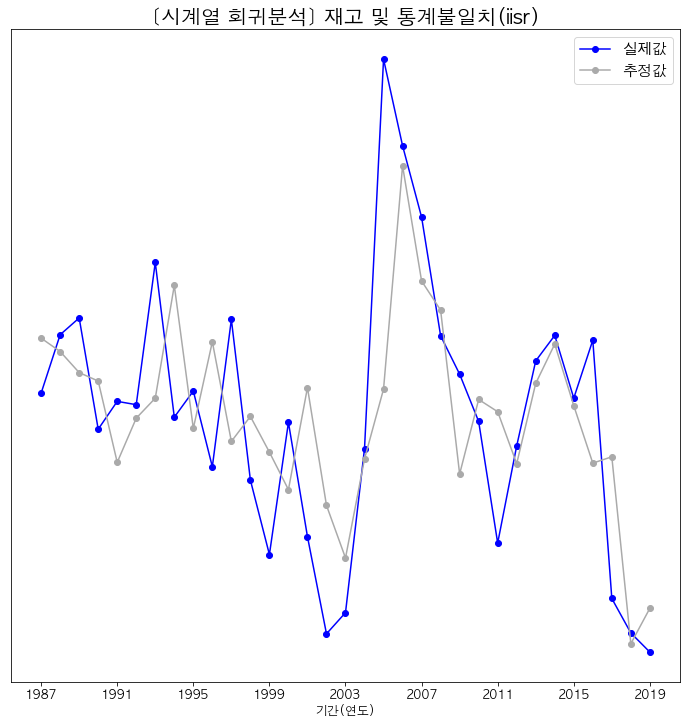

In [74]:
xticks = list(X['연도'])
plt.figure(figsize=(12, 12))
plt.title('[시계열 회귀분석] 재고 및 통계불일치(iisr)', fontsize=20)
plt.plot(X['연도'], X['iisr_target'], color='blue', marker='o')
plt.plot(X['연도'], X['iisr_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 4), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [75]:
mae = mean_absolute_error(y.values, pred)
mse = mean_squared_error(y.values, pred)
rmse = np.sqrt(mean_squared_error(y.values, pred))
mape = mean_absolute_percentage_error(y.values, pred)
r2_score1 = r2_score(y, pred)
metrix = [mae, mse, rmse, mape, r2_score1]


metrix5 = pd.DataFrame( index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], columns=['BOX 5'])
metrix5['BOX 5'] = metrix

In [32]:
metrix5

,BOX 5
MAE,4.180123e+02
MSE,3.095961e+05
RMSE,5.564136e+02
MAPE,5.830789e+15
R2,4.608241e-01


In [33]:
one_data6['연도 '] = one_data6['연도 '].astype('int64')
one_data6.head()

,연도,gdp_target,GDP_all(십억),dd,pcp,ime,ihouse,gc,fd,gxc,gxs,gmc,gms,iisr,gdp_all_pred
0,1970,72102.7,101552.488193,101659.3,62289.8,2232.0,14542.0,22595.5,82.443929,62.567672,19.876257,134.751225,17.504511,-37.0,101552.488193
1,1971,79706.3,109630.574774,109671.4,68028.0,2767.0,14330.9,24545.5,101.043357,80.523997,20.519360,163.552052,19.916531,41.6,109630.574774
2,1972,85456.6,115699.810332,115717.7,72059.2,3050.1,14059.7,26548.7,141.850220,117.480977,24.369243,162.615138,20.624750,23.5,115699.810332
3,1973,98188.2,127620.786037,127593.2,78641.1,3728.8,18074.9,27148.4,234.926275,197.459584,37.466690,242.103393,29.436845,64.2,127620.786037
4,1974,107527.7,138514.671164,138515.1,84594.5,4304.8,20508.9,29106.9,239.009793,208.841132,30.168662,323.014146,35.024483,118.6,138514.671164


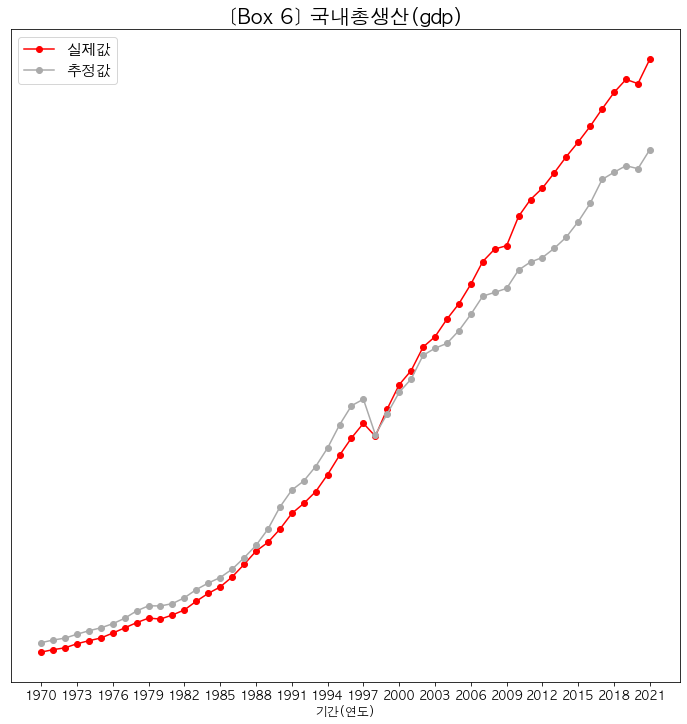

In [34]:
xticks = list(one_data6['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 6] 국내총생산(gdp)', fontsize=20)
plt.plot(one_data6['연도 '], one_data6['gdp_target'], color='red', marker='o')
plt.plot(one_data6['연도 '], one_data6['GDP_all(십억)'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 3), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [35]:
one_data7['연도 '] = one_data7['연도 '].astype('int64')
one_data7.head()

,연도,gdp_all,tot1,gni_target,gni_pred
0,1988,403748.821047,199.53,429338.0,468867.977616
1,1989,454341.931406,204.97,466944.8,527263.722378
2,1990,522920.707609,216.04,511161.1,608509.616600
3,1991,575954.303320,220.59,566970.6,669717.495586
4,1992,604116.264581,228.07,601723.3,704991.817715


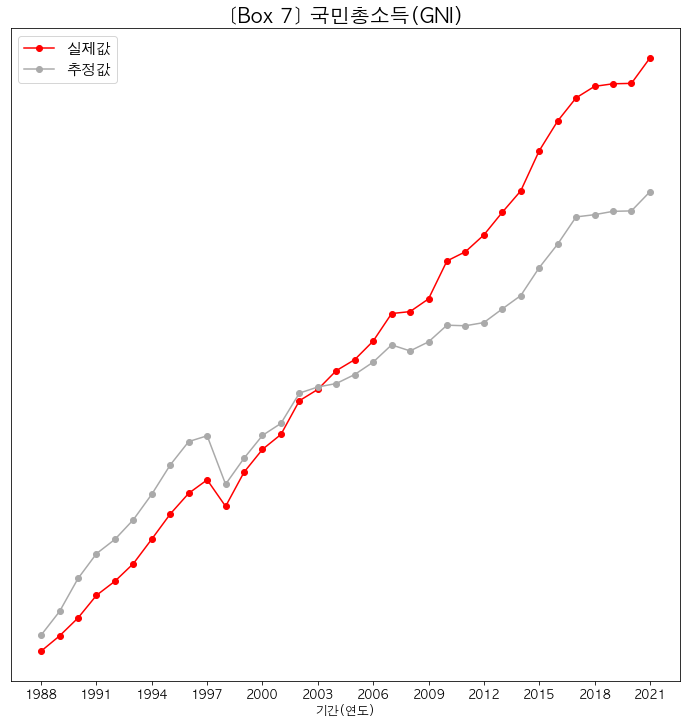

In [36]:
xticks = list(one_data7['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 7] 국민총소득(GNI)', fontsize=20)
plt.plot(one_data7['연도 '], one_data7['gni_target '], color='red', marker='o')
plt.plot(one_data7['연도 '], one_data7['gni_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 3), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [37]:
# 성능평가 
total_one_metrix

,BOX 1,BOX 2,BOX 3,BOX 4,BOX 4_2,BOX 5,BOX 6,BOX 7
MAE,4.879645e+04,2.161460e+03,3.317316e+05,1.768792e+04,1.081911e+05,5.072588e+04,9.350774e+04,1.402885e+05
MSE,6.674344e+09,9.178535e+06,2.313244e+11,7.019949e+08,1.409233e+10,3.548681e+09,1.585701e+10,3.051800e+10
RMSE,8.169666e+04,3.029610e+03,4.809619e+05,2.649519e+04,1.187111e+05,5.957080e+04,1.259246e+05,1.746940e+05
MAPE,6.476328e-02,1.810000e-02,3.406613e-01,2.117700e-01,5.574912e-01,1.247035e+19,1.448219e-01,1.167401e-01
R2,8.331472e-01,9.988000e-01,7.546012e-01,7.599532e-01,-4.586399e+00,-6.179192e+03,9.559590e-01,8.442945e-01


# 2. 잠재GDP 및 스톡부문

In [38]:
# 맥 
five_data1 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 33')
five_data2 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 34').loc[1: , :].reset_index(drop=True)
five_data3 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 35').loc[1: , :].reset_index(drop=True)
five_data4 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 36').loc[1: , :].reset_index(drop=True)
five_data5 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 37').loc[1: , :].reset_index(drop=True)
five_data6 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 38').loc[10: , :].reset_index(drop=True)
five_data7 = pd.read_excel('/Users/dongyokim/Downloads/Dataset.xlsx', sheet_name='Box 39').loc[10: , :].reset_index(drop=True)

In [ ]:
# 윈도우 
five_data1 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 33')
five_data2 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 34').loc[1: , :].reset_index(drop=True)
five_data3 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 35').loc[1: , :].reset_index(drop=True)
five_data4 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 36').loc[1: , :].reset_index(drop=True)
five_data5 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 37').loc[1: , :].reset_index(drop=True)
five_data6 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 38').loc[10: , :].reset_index(drop=True)
five_data7 = pd.read_excel('C:/Users/Innovation/Desktop/Dataset.xlsx', sheet_name='Box 39').loc[10: , :].reset_index(drop=True)

In [39]:
#[BOX 33] 총연구개발투자 정의방정식

def rndinvest_all2(privaternd, grnd):
    return privaternd + grnd

In [40]:
#[BOX 34] 민간연구개발투자 행태방정식

def privaternd (before_gdp_all, before_gdpdefl, grnd, before_user_cost, step98):
    return np.exp(1.38024 * np.log(before_gdp_all * before_gdpdefl / 100) 
                  + 0.388297 * np.log(grnd)
                  - 3.499580 * before_user_cost
                  +(-0.263171) * step98 - 7.896987)
 

In [41]:
#[BOX 35] 연구개발스톡 정의방정식

def rndstock_all2(rndinvest_all2, gdpdefl, before_rndstock_all2):
    return (rndinvest_all2 / (gdpdefl / 100)) + (1 - 0.125) * before_rndstock_all2

In [42]:
#[BOX 36] 자본스톡 정의방정식

def kstock_all (ic, before_kstock_all):
    return ic + (1 - 0.04) * before_kstock_all

In [43]:
#[BOX 37] 총요소생산성 행태방정식

def lntfp_all (before_rndstock_all2):
    return 0.322515 * np.log(before_rndstock_all2) - 3.487695

In [44]:
#[BOX 38] 잠재 GDP 정의방정식

def pgdpl_all (lntfp_all, before_lntfp_all, cefore_lntfp_all, defore_lntfp_all, eefore_lntfp_all, fefore_lntfp_all, 
               distribute_all, workhr_all_nairu, kstock_all):
    return np.exp(((lntfp_all + before_lntfp_all +  cefore_lntfp_all
                   + defore_lntfp_all + eefore_lntfp_all + fefore_lntfp_all) / 5)
                  + distribute_all * np.log(workhr_all_nairu)
                  + (1 - distribute_all) * np.log(kstock_all))

In [45]:
#[BOX 39] GDP 갭 정의방정식

def gap1_all (gdp_all, pgdp1_all):
    return gdp_all - pgdp1_all

In [46]:
def total_five(data1, data2, data3, data4, data5, data6, data7):
    
    #data1
    
    privaternd_v = data1['privaternd']
    grnd = data1['grnd']
    rndinvest_all2_pred = rndinvest_all2(privaternd_v, grnd)
    data1['rndinvest_all2_pred'] = rndinvest_all2_pred
    
    #data2
    
    before_gdp_all = data2['gdp_all(-1)(억)']
    before_gdpdefl = data2['gdpdefl(-1)']
    grnd = data2['grnd(억)']
    before_user_cost = data2['user_cost(-1)']
    step98 = data2['step98']
    privaternd_target = data2['privaternd_target(억)']
    privaternd_pred = privaternd(before_gdp_all, before_gdpdefl, grnd, before_user_cost, step98)
    
    data2['privaternd_pred'] = privaternd_pred

    privaternd_mae = mean_absolute_error(privaternd_target,privaternd_pred)
    privaternd_mse = mean_squared_error(privaternd_target,privaternd_pred)
    privaternd_rmse = np.sqrt(mean_squared_error(privaternd_target,privaternd_pred))
    privaternd_mape = mean_absolute_percentage_error(privaternd_target,privaternd_pred)
    privaternd_r2_scroe = r2_score(privaternd_target,privaternd_pred)
    privaternd_metrix = [privaternd_mae, privaternd_mse, privaternd_rmse, privaternd_mape, privaternd_r2_scroe]
    
    #data3
    rndinvest_all2_v = data3['rndinvest_all2(억)']
    gdpdefl = data3['gdpdefl']
    before_rndstock_all2 = data3['rndstock_all(-1)']
    rndstock_all2_target = data3['rndstock_all_target(억)']
    rndstock_all2_pred = rndstock_all2(rndinvest_all2_v, gdpdefl, before_rndstock_all2)
    
    data3['rndstock_all2_pred'] = rndstock_all2_pred
    
    rndstock_all2_mae = mean_absolute_error(rndstock_all2_target, rndstock_all2_pred)
    rndstock_all2_mse = mean_squared_error(rndstock_all2_target, rndstock_all2_pred)
    rndstock_all2_rmse = np.sqrt(mean_squared_error(rndstock_all2_target, rndstock_all2_pred))
    rndstock_all2_mape = mean_absolute_percentage_error(rndstock_all2_target, rndstock_all2_pred)
    rndstock_all2_r2_scroe = r2_score(rndstock_all2_target, rndstock_all2_pred)
    rndstock_all2_metrix = [rndstock_all2_mae, rndstock_all2_mse, rndstock_all2_rmse, rndstock_all2_mape, rndstock_all2_r2_scroe]
    
    #data4
    
    ic = data4['ic']
    before_kstock_all = data4['kstock_all(-1)']
    kstock_all_target = data4['kstock_all_target']
    kstock_all_pred = kstock_all(ic, before_kstock_all)
    
    data4['kstock_all_pred'] = kstock_all_pred
    
    kstock_all_mae = mean_absolute_error(kstock_all_target,kstock_all_pred)
    kstock_all_mse = mean_squared_error(kstock_all_target,kstock_all_pred)
    kstock_all_rmse = np.sqrt(mean_squared_error(kstock_all_target,kstock_all_pred))
    kstock_all_mape = mean_absolute_percentage_error(kstock_all_target,kstock_all_pred)
    kstock_all_r2_scroe = r2_score(kstock_all_target,kstock_all_pred)
    kstock_all_metrix = [kstock_all_mae, kstock_all_mse, kstock_all_rmse, kstock_all_mape, kstock_all_r2_scroe]
      
    #data5
    
    before_rndstock_all2 = data5['rndstock_all2(-1)']
    lntfp_all_pred = lntfp_all(before_rndstock_all2)
    
    data5['lntfp_all_pred'] = lntfp_all_pred

    #data6
    
    lntfp_all_v = data6['lntfp_all(%)']
    before_lntfp_all = data6['lntfp_all(-1)']
    cefore_lntfp_all = data6['lntfp_all(-2)']
    defore_lntfp_all = data6['lntfp_all(-3)']
    eefore_lntfp_all = data6['lntfp_all(-4)']
    fefore_lntfp_all = data6['lntfp_all(-5)']
    distribute_all = data6['distribute_all']
    workhr_all_nairu = data6['workhr_all_nairu']
    kstock_all_v = data6['kstock_all(억)']
    pgdpl_all_target = data6['pgdp1_all_target']
    pgdpl_all_pred = pgdpl_all(lntfp_all_v, before_lntfp_all, cefore_lntfp_all, defore_lntfp_all, eefore_lntfp_all, fefore_lntfp_all, 
                                distribute_all, workhr_all_nairu, kstock_all_v)
    
    data6['pgdpl_all_pred'] = pgdpl_all_pred
    pgdpl_all_mae = mean_absolute_error(pgdpl_all_target,pgdpl_all_pred)
    pgdpl_all_mse = mean_squared_error(pgdpl_all_target,pgdpl_all_pred)
    pgdpl_all_rmse = np.sqrt(mean_squared_error(pgdpl_all_target,pgdpl_all_pred))
    pgdpl_all_mape = mean_absolute_percentage_error(pgdpl_all_target,pgdpl_all_pred)
    pgdpl_all_r2_scroe = r2_score(pgdpl_all_target,pgdpl_all_pred)
    pgdpl_all_metrix = [pgdpl_all_mae, pgdpl_all_mse, pgdpl_all_rmse, pgdpl_all_mape, pgdpl_all_r2_scroe]
    
    #data7
    
    gdp_all = data7['gdp_all(십억)']
    pgdp1_all = data7['pgdp1_all']
    gap1_all_target = data7['gap1_all_target']
    gap1_all_pred = gap1_all(gdp_all, pgdp1_all)
    
    data7['gap1_all_pred'] = gap1_all_pred
    gap1_all_mae = mean_absolute_error(gap1_all_target,gap1_all_pred)
    gap1_all_mse = mean_squared_error(gap1_all_target,gap1_all_pred)
    gap1_all_rmse = np.sqrt(mean_squared_error(gap1_all_target,gap1_all_pred))
    gap1_all_mape = mean_absolute_percentage_error(gap1_all_target,gap1_all_pred)
    gap1_all_r2_scroe = r2_score(gap1_all_target,gap1_all_pred)
    gap1_all_metrix = [gap1_all_mae, gap1_all_mse, gap1_all_rmse, gap1_all_mape, gap1_all_r2_scroe]
    
    # 성능 지표 집계 
    total_five_metrix = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], columns=['BOX 34', 'BOX 35', 'BOX 36', 'BOX 38', 'BOX 39'])
    total_five_metrix['BOX 34'] = privaternd_metrix
    total_five_metrix['BOX 35'] = rndstock_all2_metrix
    total_five_metrix['BOX 36'] = kstock_all_metrix
    total_five_metrix['BOX 38'] = pgdpl_all_metrix
    total_five_metrix['BOX 39'] = gap1_all_metrix
    
    return data1, data2, data3, data4, data5, data6, data7, total_five_metrix
    


In [47]:
five_data1, five_data2, five_data3, five_data4, five_data5, five_data6, five_data7, total_five_metrix = total_five(five_data1, five_data2, five_data3, five_data4, five_data5, five_data6, five_data7)

In [48]:
# box 33 
five_data1['연도 '] = five_data1['연도 '].astype('int64')
five_data1.head()

,연도,privaternd,grnd,rndinvest_all2_pred
0,1970,3023,7414,10437
1,1971,2969,7286,10255
2,1972,3835,7966,11801
3,1973,6940,8353,15293
4,1974,5035,17777,22812


In [49]:
# box 34
five_data2['연도 '] = five_data2['연도 '].astype('int64')
five_data2.head()

,연도,gdp_all(-1)(억),gdpdefl(-1),grnd(억),user_cost(-1),step98,privaternd_target(억),privaternd_pred
0,1971,1.015525e+06,3.879,72.86,42.552,0,29.69,9.199540e-62
1,1972,1.096306e+06,4.313,79.66,42.291,0,38.35,3.054553e-61
2,1973,1.156998e+06,4.994,83.53,43.587,0,69.40,4.399482e-63
3,1974,1.276208e+06,5.629,177.77,43.213,0,50.35,2.949333e-62
4,1975,1.385147e+06,7.352,284.59,48.523,0,142.05,4.873665e-70


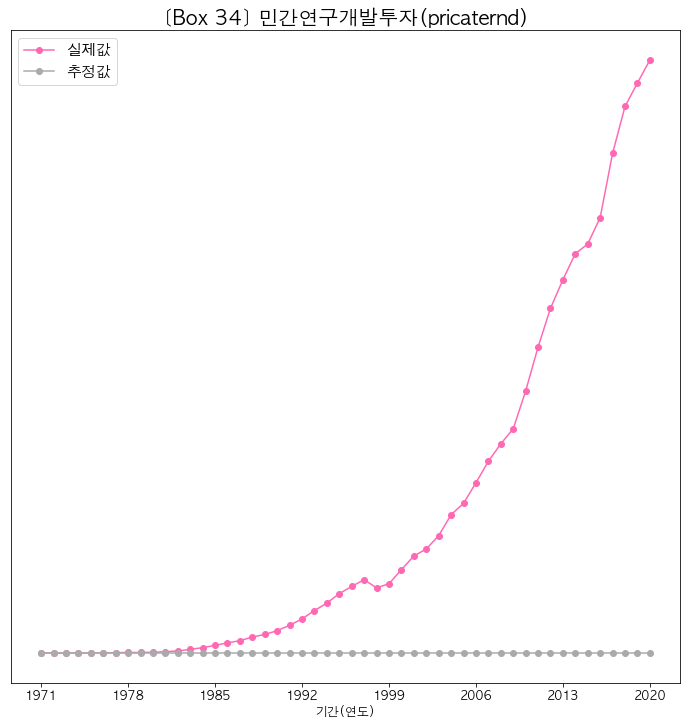

In [50]:
xticks = list(five_data2['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 34] 민간연구개발투자(pricaternd)', fontsize=20)
plt.plot(five_data2['연도 '], five_data2['privaternd_target(억)'], color='hotpink', marker='o')
plt.plot(five_data2['연도 '], five_data2['privaternd_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 7), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [51]:
X = five_data2[['gdp_all(-1)(억)', 'gdpdefl(-1)', 'grnd(억)', 'user_cost(-1)', 'step98' ]]
y = five_data2['privaternd_target(억)']


lr_model = LinearRegression()
lr_model.fit(X, y)
pred = lr_model.predict(X)

X['privaternd_pred'] = pred
X['privaternd_target(억)'] = y
X['연도'] = five_data2['연도 ']

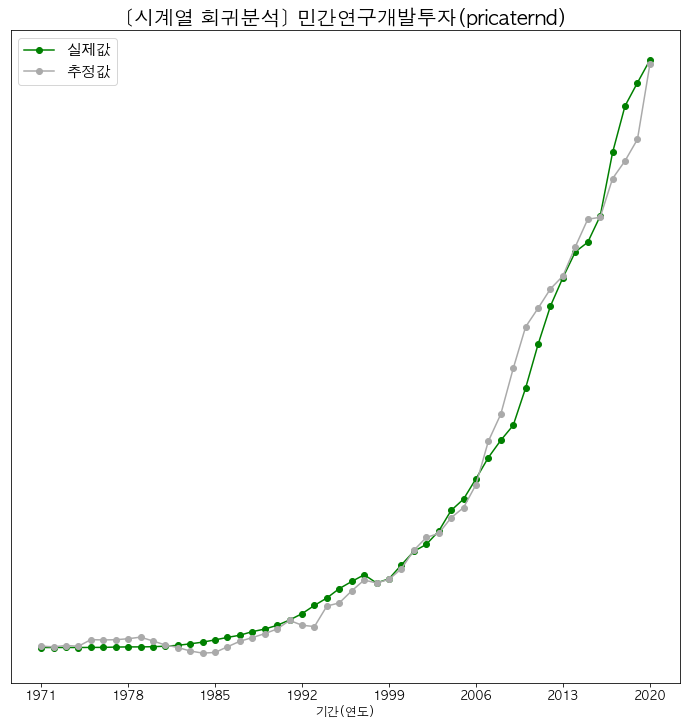

In [52]:
xticks = list(X['연도'])
plt.figure(figsize=(12, 12))
plt.title('[시계열 회귀분석] 민간연구개발투자(pricaternd)', fontsize=20)
plt.plot(X['연도'], X['privaternd_target(억)'], color='green', marker='o')
plt.plot(X['연도'], X['privaternd_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 7), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [53]:
mae = mean_absolute_error(y.values, pred)
mse = mean_squared_error(y.values, pred)
rmse = np.sqrt(mean_squared_error(y.values, pred))
mape = mean_absolute_percentage_error(y.values, pred)
r2_score1 = r2_score(y, pred)
metrix = [mae, mse, rmse, mape, r2_score1]


metrix34 = pd.DataFrame( index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], columns=['BOX 34'])
metrix34['BOX 34'] = metrix

In [54]:
metrix34

,BOX 34
MAE,1.476183e+04
MSE,5.621202e+08
RMSE,2.370907e+04
MAPE,6.286258e+00
R2,9.870755e-01


In [55]:
# box 35
five_data3['연도'] = five_data3['연도'].astype('int64')
five_data3.head()

,연도,rndinvest_all2(억),gdpdefl,rndstock_all(-1),rndstock_all_target(억),rndstock_all2_pred
0,1971,102.55,4.313,13162.0,14632,13894.445340
1,1972,118.01,4.994,14632.0,16225,15166.035643
2,1973,152.93,5.629,16225.0,18407,16913.698592
3,1974,228.12,7.352,18407.0,20912,19208.954162
4,1975,426.64,9.093,20912.0,24571,22989.960849


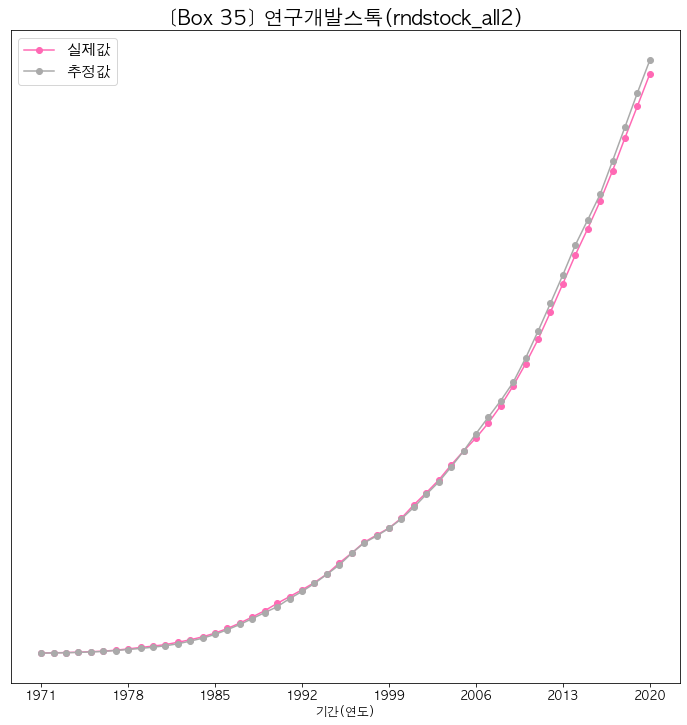

In [56]:
xticks = list(five_data3['연도'])
plt.figure(figsize=(12, 12))
plt.title('[Box 35] 연구개발스톡(rndstock_all2)', fontsize=20)
plt.plot(five_data3['연도'], five_data3['rndstock_all_target(억)'], color='hotpink', marker='o')
plt.plot(five_data3['연도'], five_data3['rndstock_all2_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 7), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [57]:
# box 36
five_data4['연도 '] = five_data4['연도 '].astype('int64')
five_data4.head()

,연도,ic,kstock_all(-1),kstock_all_target,kstock_all_pred
0,1971,17097.9,97878.1,113165.3,111060.876
1,1972,17109.8,113165.3,128496.8,125748.488
2,1973,21803.7,128496.8,148359.2,145160.628
3,1974,24813.7,148359.2,171104.8,167238.532
4,1975,26970.2,171104.8,195245.6,191230.808


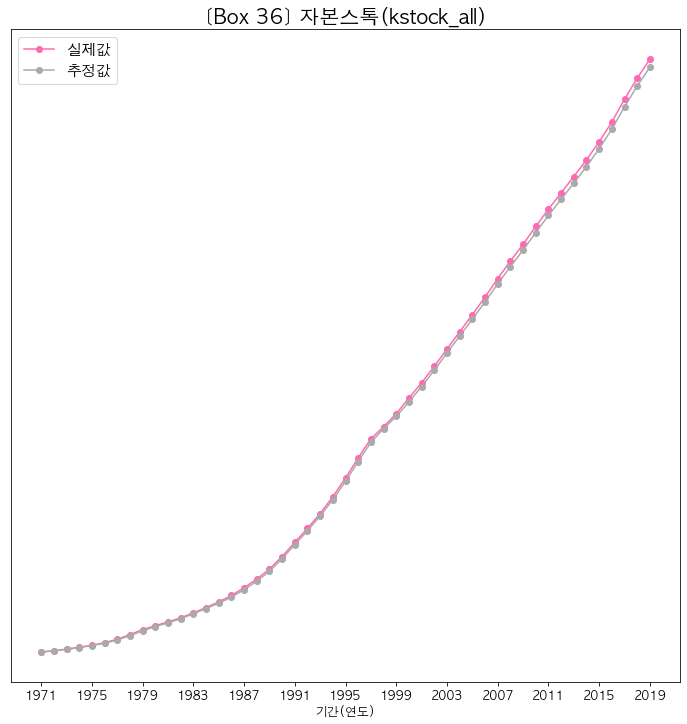

In [58]:
xticks = list(five_data4['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 36] 자본스톡(kstock_all)', fontsize=20)
plt.plot(five_data4['연도 '], five_data4['kstock_all_target'], color='hotpink', marker='o')
plt.plot(five_data4['연도 '], five_data4['kstock_all_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 4), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [59]:
# box 37
five_data5['연도 '] = five_data5['연도 '].astype('int64')
five_data5.head()

,연도,rndstock_all2(-1),lntfp_all_pred
0,1971,1.389445e+12,5.529800
1,1972,1.516604e+12,5.558043
2,1973,1.691370e+12,5.593218
3,1974,1.920895e+12,5.634259
4,1975,2.298996e+12,5.692209


In [60]:
# box 38
five_data6['연도 '] = five_data6['연도 '].astype('int64')
five_data6.head()

,연도,lntfp_all(%),lntfp_all(-1),lntfp_all(-2),lntfp_all(-3),lntfp_all(-4),lntfp_all(-5),distribute_all,workhr_all_nairu,kstock_all(억),pgdp1_all_target,pgdpl_all_pred
0,1980,0.059974,0.059417,0.058842,0.058174,0.057441,0.056922,0.508,2772.000000,4357296,227779.0828,111147.884775
1,1981,0.060523,0.059974,0.059417,0.058842,0.058174,0.057441,0.506,2756.571429,4812134,238857.1655,118217.530021
2,1982,0.061155,0.060523,0.059974,0.059417,0.058842,0.058174,0.514,2874.857143,5321647,259304.4716,119588.653942
3,1983,0.061859,0.061155,0.060523,0.059974,0.059417,0.058842,0.531,2849.142857,5921356,276821.9122,110189.882165
4,1984,0.062473,0.061859,0.061155,0.060523,0.059974,0.059417,0.524,2833.714286,6583451,294831.3456,121999.144742


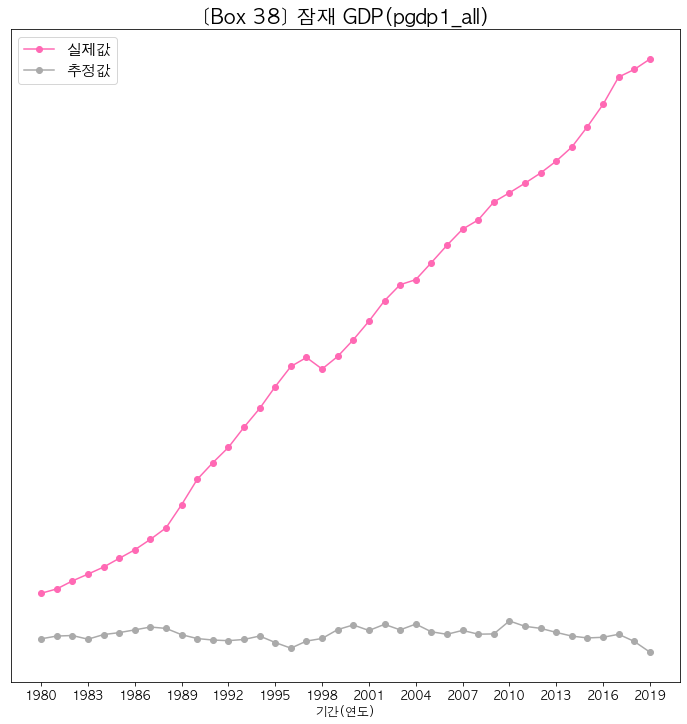

In [61]:
xticks = list(five_data6['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 38] 잠재 GDP(pgdp1_all)', fontsize=20)
plt.plot(five_data6['연도 '], five_data6['pgdp1_all_target'], color='hotpink', marker='o')
plt.plot(five_data6['연도 '], five_data6['pgdpl_all_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 3), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [62]:
X = five_data6[['lntfp_all(%)', 'lntfp_all(-1)', 'lntfp_all(-2)', 'lntfp_all(-3)', 'lntfp_all(-4)', 'lntfp_all(-5)', 'distribute_all', 'workhr_all_nairu', 'kstock_all(억)' ]]
y = five_data6['pgdp1_all_target']


lr_model = LinearRegression()
lr_model.fit(X, y)
pred = lr_model.predict(X)

X['pgdp1_all_pred'] = pred
X['pgdp1_all_target'] = y
X['연도'] = five_data6['연도 ']

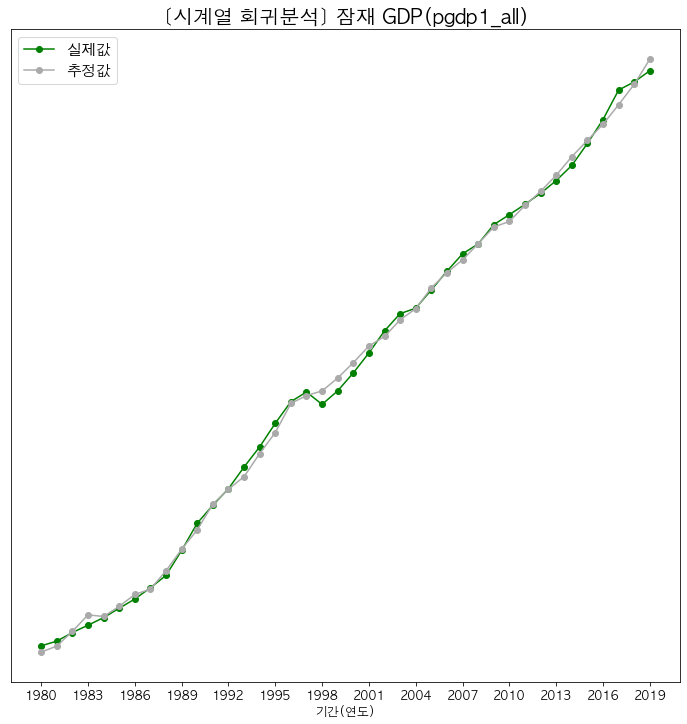

In [63]:
xticks = list(X['연도'])
plt.figure(figsize=(12, 12))
plt.title('[시계열 회귀분석] 잠재 GDP(pgdp1_all)', fontsize=20)
plt.plot(X['연도'], X['pgdp1_all_target'], color='green', marker='o')
plt.plot(X['연도'], X['pgdp1_all_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 3), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [64]:
mae = mean_absolute_error(y.values, pred)
mse = mean_squared_error(y.values, pred)
rmse = np.sqrt(mean_squared_error(y.values, pred))
mape = mean_absolute_percentage_error(y.values, pred)
r2_score1 = r2_score(y, pred)
metrix = [mae, mse, rmse, mape, r2_score1]


metrix38 = pd.DataFrame( index=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'], columns=['BOX 38'])
metrix38['BOX 38'] = metrix

In [65]:
metrix38

,BOX 38
MAE,1.218672e+04
MSE,2.359561e+08
RMSE,1.536086e+04
MAPE,1.818467e-02
R2,9.986693e-01


In [66]:
# box 39
five_data7['연도 '] = five_data7['연도 '].astype('int64')
five_data7.head()

,연도,gdp_all(십억),pgdp1_all,gap1_all_target,gap1_all_pred
0,1980,215644.752576,111147.9,-12134.330230,104496.852576
1,1981,222941.380363,118217.5,-15915.785150,104723.880363
2,1982,241130.468216,119588.7,-18174.003390,121541.768216
3,1983,266567.076819,110189.9,-10254.835440,156377.176819
4,1984,286831.611925,121999.1,-7999.733656,164832.511925


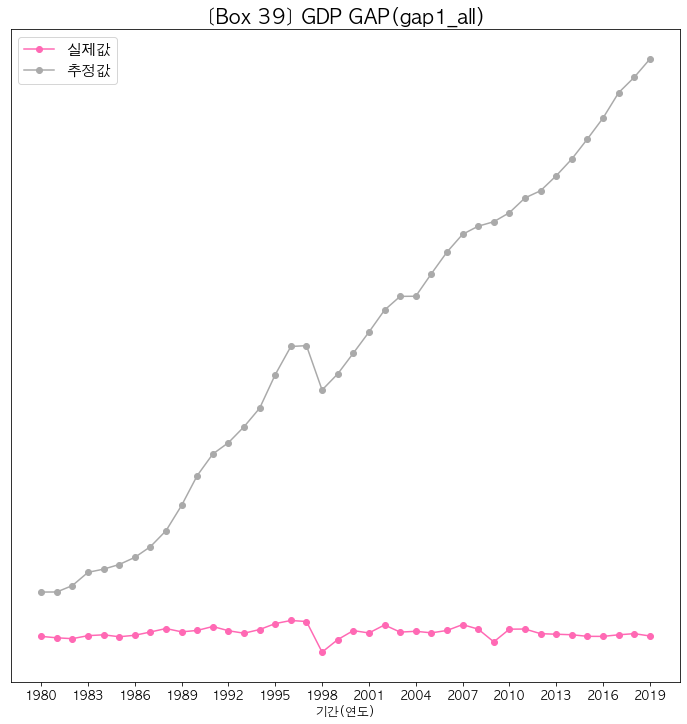

In [67]:
xticks = list(five_data7['연도 '])
plt.figure(figsize=(12, 12))
plt.title('[Box 39] GDP GAP(gap1_all)', fontsize=20)
plt.plot(five_data7['연도 '], five_data7['gap1_all_target'], color='hotpink', marker='o')
plt.plot(five_data7['연도 '], five_data7['gap1_all_pred'], color='#AAAAAA', marker='o')
plt.legend(['실제값', '추정값'], loc='best', fontsize=15)
plt.xlabel('기간(연도)', size='large')
plt.xticks(np.arange(xticks[0], xticks[-1]+1, 3), label = xticks, fontsize=12)
ax = plt.gca()
ax.axes.yaxis.set_visible(False)
plt.show()

In [68]:
total_five_metrix

,BOX 34,BOX 35,BOX 36,BOX 38,BOX 39
MAE,1.638883e+05,2.482514e+04,4.050692e+04,7.522868e+05,7.522868e+05
MSE,7.035190e+10,1.432096e+09,2.483873e+09,7.433393e+11,7.433393e+11
RMSE,2.652393e+05,3.784305e+04,4.983847e+04,8.621712e+05,8.621713e+05
MAPE,1.000000e+00,4.045711e-02,1.878301e-02,8.047731e-01,1.870022e+02
R2,-6.175628e-01,9.991311e-01,9.995333e-01,-3.192053e+00,-3.350287e+03


In [ ]:
total_five_metrix.to_excel('asdsd.xlsx')